In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [3]:
# Stock Data Time and Downloading the data of Apple stock from Yahoo Finance
start='2010-01-01'
end='2024-07-30'
data=yf.download('AAPL',start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Loading the data
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.447412,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.458560,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.355827,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.344079,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.386255,447610800
...,...,...,...,...,...,...
2024-07-23,224.369995,226.940002,222.679993,225.009995,224.502853,39960300
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.047440,61777600
2024-07-25,218.929993,220.850006,214.619995,217.490005,216.999817,51391200


In [5]:
# format to serial number
data.reset_index(inplace=True)

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.447412,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.458560,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.355827,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.344079,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.386255,447610800
...,...,...,...,...,...,...,...
3661,2024-07-23,224.369995,226.940002,222.679993,225.009995,224.502853,39960300
3662,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.047440,61777600
3663,2024-07-25,218.929993,220.850006,214.619995,217.490005,216.999817,51391200
3664,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.468750,41601300


In [7]:
# Plotting MOVING AVERAGE of last 100 days
ma_100_days=data.Close.rolling(100).mean()

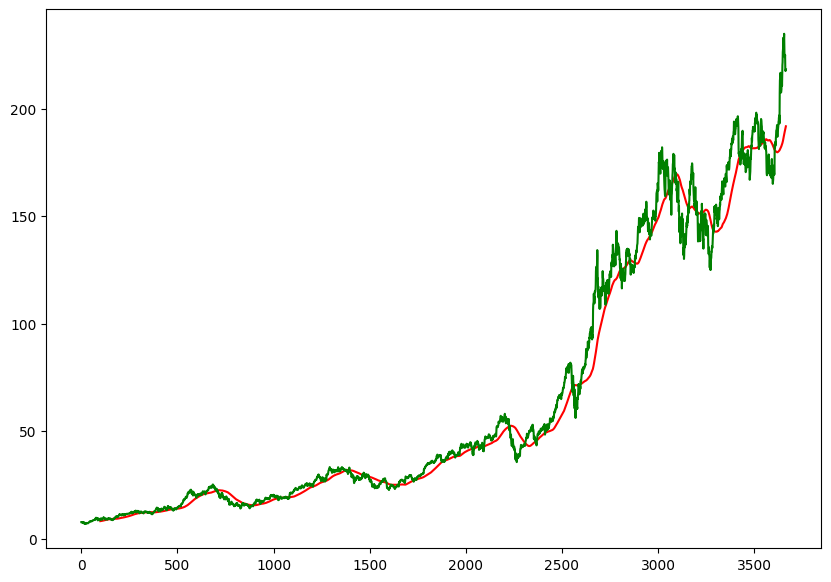

In [8]:
plt.figure(figsize=(10,7))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [9]:
# Plotting MOVING AVERAGE of last 200 days
ma_200_days=data.Close.rolling(200).mean()

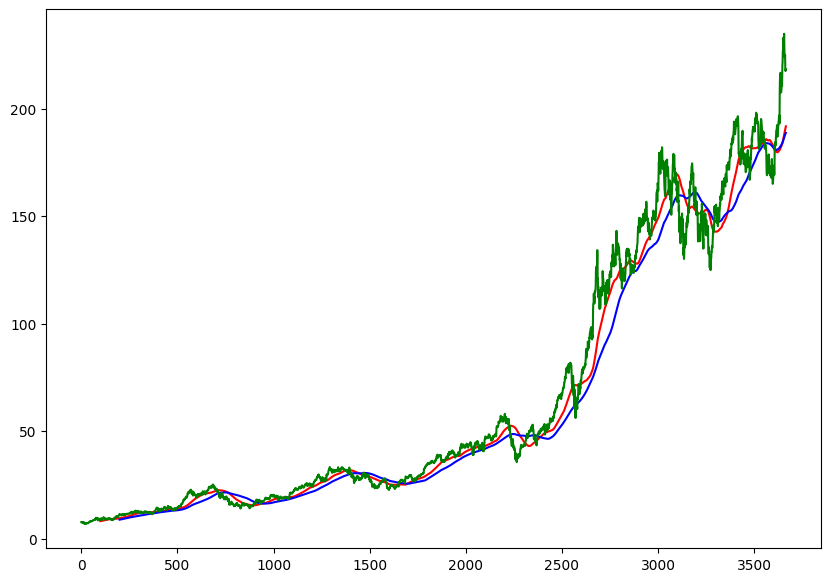

In [10]:
plt.figure(figsize=(10,7))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [11]:
# Droping the null values
data.dropna(inplace=True)

In [12]:
# converting data into testing data and training data
#80%--training data
#20%--testing data
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [13]:
# Number of Rows in training data
data_train.shape[0]


2932

In [14]:
# Number of Rows in test data
data_test.shape[0]

734

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale=scaler.fit_transform(data_train)

In [17]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [18]:
x,y=np.array(x),np.array(y)

In [19]:
# Preparation of Model

In [1]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input
from tensorflow.keras.models import Sequential

In [21]:
# Build the model
model = Sequential()

# Add an Input layer as the first layer
model.add(Input(shape=(x.shape[1], 1)))

# Add LSTM layers and Dropout
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Final LSTM layer without return_sequences
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

# Compile the model (IMPORTANT)
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
# Fit the model to the data
model.fit(x, y, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - loss: 0.0321
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - loss: 0.0043
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - loss: 0.0043
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - loss: 0.0037
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 14s 155ms/step - loss: 0.0032
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - loss: 0.0028
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - loss: 0.0025
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - loss: 0.0031
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - loss: 0.0028
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - loss: 0.0024
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 143ms/step - loss: 0.0025
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - loss: 0.0028
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - loss: 0.0027
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - loss: 0.0022
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [24]:
#Testing of the model 

In [25]:
past_100_days=data_train.tail(100)

In [26]:
data_test=pd.concat([past_100_days,data_test],ignore_index=True)

In [27]:
data_test_scale=scaler.fit_transform(data_test)

In [28]:
x=[]
y=[]

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)    

In [29]:
# Predicting the values
y_predict=model.predict(x)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


In [30]:
y_predict

array([[0.21204588],
       [0.21310014],
       [0.21399692],
       [0.21499962],
       [0.2162838 ],
       [0.2179517 ],
       [0.22007884],
       [0.2227059 ],
       [0.22594027],
       [0.22968663],
       [0.2336981 ],
       [0.23740686],
       [0.24039131],
       [0.24235125],
       [0.24323681],
       [0.24313699],
       [0.24206394],
       [0.23993003],
       [0.23679431],
       [0.23298979],
       [0.2288776 ],
       [0.22478557],
       [0.22085443],
       [0.21692404],
       [0.2128892 ],
       [0.20867401],
       [0.20429441],
       [0.19967374],
       [0.19488682],
       [0.19006729],
       [0.18542293],
       [0.18113932],
       [0.17735139],
       [0.17406881],
       [0.17123954],
       [0.16891113],
       [0.16717444],
       [0.16618612],
       [0.16617012],
       [0.16731529],
       [0.16973168],
       [0.17324252],
       [0.1774893 ],
       [0.18216899],
       [0.1869852 ],
       [0.19192177],
       [0.1968408 ],
       [0.201

In [31]:
# Converting above values into actual price...as they are between 0 and 1
scale=1/scaler.scale_


In [32]:
# Predicted values
y_predict=y_predict*scale

In [33]:
# Actual values
y=y*scale

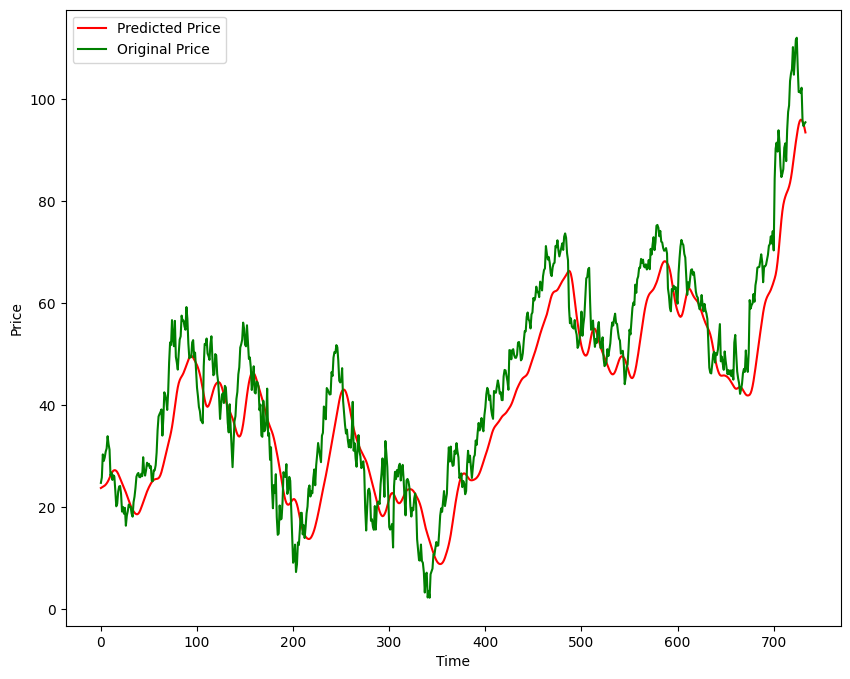

In [34]:
# Ploting the predicted price vs original price
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [2]:
model.save('Stock Predictions Model.keras')

NameError: name 'model' is not defined